Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Steven Raaijmakers - 10804242
Nizar El Mahjoubi - 10642021

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

In [4]:
import numpy as np
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
from scipy.linalg import lstsq

To fit a straight line to the given data, we must fit to a function: $y = a + b \cdot x$. The first three equations (given t (or x) and w (or y)) therefore become:

$a + b * 3 = 74$

$ a + b * 11 = 72$

$ a + b * 29 = 52$

For the quadratic line we must fit our data to the function $y = a + b \cdot x^2$, which changes the first equation into:

$a + b * 3^2 = 74$

And for the cubic function the formula becomes $y = a + b \cdot x^3$, changing the first equation into:

$a + b * 3^3 = 74$

In [14]:
def fit_lstsq(x, y, power, N=100, r=None):
    new_x = []
    if r:
        new_x = np.linspace(r[0], r[-1], N)
    else:
        new_x = np.linspace(x[0], x[-1], N)
    M = x[:, np.newaxis]**[0, power]
    p, _, _, _ = lstsq(M, y)
    return new_x, (p[0] + p[1] * new_x ** power), M

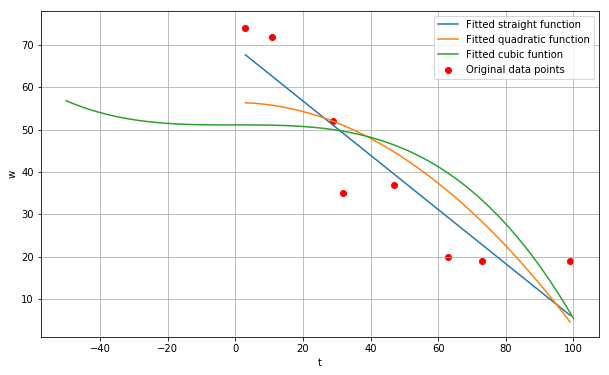

In [15]:
x1, y1, v1 = fit_lstsq(t, w, 1)
x2, y2, v2 = fit_lstsq(t, w, 2)
x3, y3, v3 = fit_lstsq(t, w, 3, r=[-50, 100])

plt.plot(x1, y1, label="Fitted straight function")
plt.plot(x2, y2, label="Fitted quadratic function")
plt.plot(x3, y3, label="Fitted cubic funtion")
plt.scatter(t, w, c="red", label="Original data points")
plt.xlabel("t")
plt.ylabel("w")
plt.legend()

To show the cubic behaviour of the third solution, we extended the x-range for this function.

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [16]:
from numpy import linalg as LA

print("Condition number for straight fit: " + str(LA.cond(v1)))
print("Condition number for quadratic fit: " + str(LA.cond(v2)))
print("Condition number for cubic fit: " + str(LA.cond(v3)))

Condition number for straight fit: 95.9797884438
Condition number for quadratic fit: 5842.47274647
Condition number for cubic fit: 468867.12005


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

In [33]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

We must find a solution to the above formula given x and y, which gives us, for $x_1$ and $y_1$ the following equation:

$a*0.39^2 + b * 1.02 * 0.39 + c * 1.02 + d * 0.39 + e = 1.02^2$

In [34]:
def solve(x, y, tol=None):
    tmp1, tmp2 = np.array([y**2, x*y, x, y, np.ones(10)]).T, x**2
    (a, b, c, d, e), _, _, _ = lstsq(tmp1, tmp2, cond=tol)
    return a, b, c, d, e

a, b, c, d, e = solve(x, y)
print(a, b, c, d, e)

-2.63562548371 0.143646182599 0.55144696314 3.22294033811 -0.432894270264


Now we have found values for the parameters $a, b, c, d, e$ we can plot the orbit. We do so by rewriting the original formula with respect to y:

$y = \frac{1}{2a} * (-d -bx \pm \sqrt{(d+bx)^{2} - 4a (e + cx - x^2)})$

We can find the range for each of these lines by setting the part of the root to zero:

$(d+bx)^{2} - 4a (e + cx - x^2) = 0$

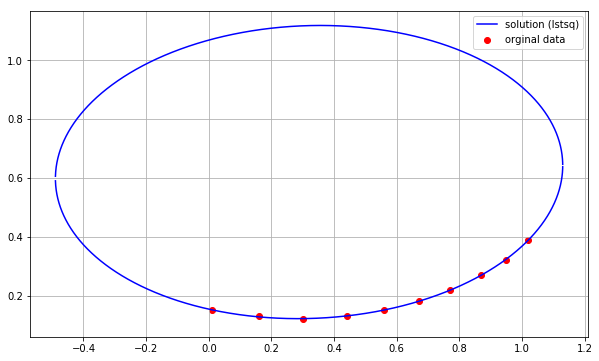

In [35]:
def ellipse(a, b, c, d, e, x):
    top = (1/(2*a)) * (-d -b*x - np.sqrt((d+b*x)**2 - 4 * a * (e + c * x - x **2)))
    bot = (1/(2*a)) * (-d -b*x + np.sqrt((d+b*x)**2 - 4 * a * (e + c * x - x **2)))
    return top, bot

new_x = np.linspace(-0.4896, 1.1302, 10000)

new_y1, new_y2 = ellipse(a, b, c, d, e, new_x)

plt.plot(new_x, new_y1, color="blue", label="solution (lstsq)")
plt.plot(new_x, new_y2, color="blue")
plt.scatter(x, y, c="red", label="orginal data")

plt.legend()

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

In [36]:
np.random.seed(1) # keep pertubations steady

p_x = x + np.random.uniform(-0.005, 0.005, 10)
p_y = y + np.random.uniform(-0.005, 0.005, 10)

a2, b2, c2, d2, e2 = solve(p_x, p_y)

print(a, b, c, d, e)
print(a2, b2, c2, d2, e2)

-2.63562548371 0.143646182599 0.55144696314 3.22294033811 -0.432894270264
-2.87045299502 0.299180184638 0.511971020451 3.22804911882 -0.420910954933


The pertubations to x and y, give us slightly different values for a, b, c, d and e.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


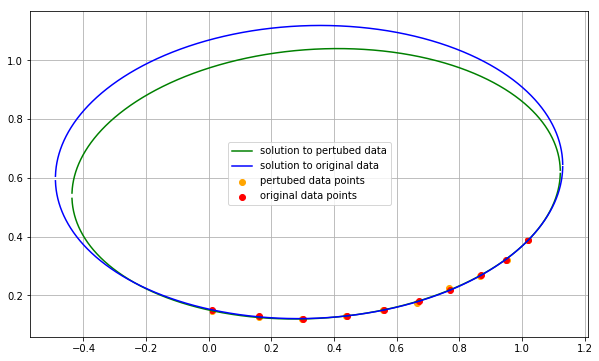

In [37]:
new_y3, new_y4  = ellipse(a2, b2, c2, d2, e2, new_x)

plt.plot(new_x, new_y3, color="green", label="solution to pertubed data")
plt.plot(new_x, new_y4, color="green")
plt.plot(new_x, new_y1, color="blue", label="solution to original data")
plt.plot(new_x, new_y2, color="blue")
plt.scatter(p_x, p_y, c="orange", label="pertubed data points")
plt.scatter(x, y, c="red", label="original data points")
plt.legend()


In the plot above we can see the solution to the original data and the solution to the pertubed data. The difference can be seen in the changing radius of the "new" solution. However the bottom right part of the new solution will stay approximately in the same position. In other words, a very small pertubation of the data has a fairly larger influence on the radius of the ellipse.

## (c)
Can you explain this behaviour?

A small perturbation in the input data leads to a small perturbation in the output data. However, since the problem is nearly rank-deficient, the plot is gravely perturbated.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

In [38]:
Ks = [10**(-k) for k in range(1, 4)]

For $k < 10^{-4}$ the parameters will not change anymore, therefore we choose k to let k run for $10^{-1}, 10^{-2}, 10^{-3}$.

0.10441934702 0.340136609715 0.891788709417 0.202487930978 -0.171789387561
0.105221090177 0.340021691462 0.890081288003 0.205364541818 -0.171671488843

0.419164878436 0.876871273878 0.525345010533 0.756138531246 -0.167447774293
0.423832545019 0.888232741619 0.515810631385 0.762030334173 -0.165168367856

-2.63562548371 0.143646182599 0.55144696314 3.22294033811 -0.432894270264
-2.87045299502 0.299180184638 0.511971020451 3.22804911882 -0.420910954933



/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


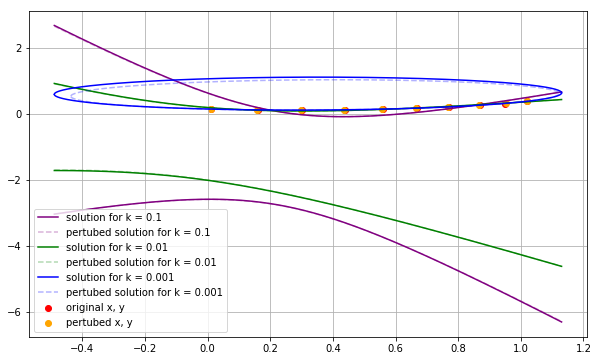

In [39]:
colors = ["purple", "green", "blue"]

for i, k in enumerate(Ks):
    # original data
    a, b, c, d, e = solve(x, y, tol=k)
    t_y1, t_y2 = ellipse(a, b, c, d, e, new_x)
    plt.plot(new_x, t_y1, label="solution for k = " + str(k), color=colors[i])
    plt.plot(new_x, t_y2, color=colors[i])
#     pertubed data
    a2, b2, c2, d2, e2 = solve(p_x, p_y, tol=k)
    t2_y1, t2_y2 = ellipse(a2, b2, c2, d2, e2, new_x)
    plt.plot(new_x, t2_y1, "--", label="pertubed solution for k = " + str(k), color=colors[i], alpha=0.3)
    plt.plot(new_x, t2_y2, "--", color=colors[i], alpha=0.3)
    print(a, b, c, d, e)
    print(a2, b2, c2, d2, e2)
    print()
    
plt.scatter(x, y, color="red", label="original x, y")
plt.scatter(p_x, p_y, color="orange", label="pertubed x, y")
# plt.scatter(p_x, p_y, color="orange", label="pertubed x, y")
plt.legend()

We can see that $rcond$ for a higher value of $k$ have big influences on $a,b,c,d,e$. The bottom part of the ellipse is still fitted in the right way, the top part seemed to shift down the y-axis. 

We also see that for $k = 0.1$ and $k = 0.01$ the solution to the pertubed data is closer to the original solution, and therefore the lines are almost overlapping. For $k = 0.001$ however, we can see that the solution to the pertubed data and the original data differs more, like the behaviour we've seen in $2b$.